In [93]:
import numpy as np
import numpy.random as nr

weeks = 52

zpower = 17.
zpower_err = 0.75

dist_normal       = 250 # km normal
dist_normal_err   = 30  # add distance uniform ;-)

dist_vacation     = 100 # km vacation
dist_vacation_err = 700 # add distance uniform ;-)

temp_a = ((weeks/2)**2)*3
temp_b = (weeks/2)**2
temp_b = 0.

normal_weeks = [0,1,2,3,4,5,6,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,38,39,40,41,42,43,44,45,46,47,48,49,50,51]
vacation_weeks = [7,8,9,10,11,12,30,31,32,33,34,35,36,37]

# temp factor with max. at the end and min in the middle 'summer' ;-)
temp = (((np.arange(weeks)-weeks/2)**2)-temp_b)/temp_a


power = zpower + nr.uniform(low=-zpower_err, high=zpower_err, size=weeks)
power *= (1+temp)

#print(power)

drange = np.zeros(weeks, dtype=np.float64)

for i in normal_weeks:
    drange[i] = dist_normal + nr.uniform(low=0., high=dist_normal_err)
        
for i in vacation_weeks:
    drange[i] = dist_vacation + nr.uniform(low=0., high=dist_vacation_err)

#print(drange)


# calculate the total power
tpower = drange * power / 100.0


drange[51] = -drange[51]

# number for the week
nr = np.arange(weeks)


np.savetxt('data/test.dat', np.vstack([nr, tpower, drange]).T, fmt=['%-3i', '%6.1f', '%6.1f'], delimiter='\t')
#np.savetxt('data/test.dat', np.vstack([nr, tpower, drange]).T, delimiter='\t')
#np.savetxt('data/test.dat', (nr,tpower,drange))

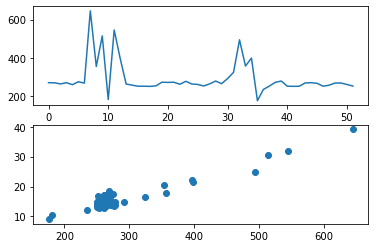

In [85]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2)
ax[0].plot(nr, drange)

ax[1].scatter(drange, tpower*0.3)